In [137]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

def e_str(typ, r):
    r_eq_cc = 1.538 # ang
    k_cc = 1735 # kJ/mol/ang^2

    r_eq_ch =  1.083 # ang
    k_ch = 1934 # kJ/mol/ang^2

    if typ == 'cc':
        return k_cc*(r-r_eq_cc)**2
    elif typ == 'ch':
        return k_ch*(r-r_eq_ch)**2
    else:
        print(typ, 'not avalibale')
        return None

def e_bend(typ, theta):
    a_eq_cch = np.radians(110.7) 
    k_cch = 0.093 # kj/mol/degree

    a_eq_ccc = 112.5
    k_ccc = 0.110

    if typ == 'ccc':
        return k_ccc*(theta-a_eq_ccc)**2
    elif typ == 'cch' or typ == 'hcc':
        return k_cch*(theta-a_eq_cch)**2
    else:
        print(typ, 'is not avalibale')
        return None

def e_nb(r):
    k_nb = 4.7
    sigma = 3.85
    a = (sigma/r)**6
    return k_nb*a*(a-1)

def e_torsion(phi):
    phi = np.radians(phi)
    k_0 = 20.1
    k_1 = -4.7
    k_2 = 1.91
    k_3 = -7.75
    k_4 = 0.58
    r = k_0 + (
        k_1*(1 + np.cos(1*phi)) +
        k_2*(1 + np.cos(2*phi)) +
        k_3*(1 + np.cos(3*phi)) +
        k_4*(1 + np.cos(4*phi)))
    return r

e_str('ch', 1)
e_bend('cch', 120)
3*e_nb(3.931)

-1.4613935500718285

In [128]:
x = np.linspace(1, 2, 100)
y_ch = e_str('ch', x)
y_cc = e_str('cc', x)

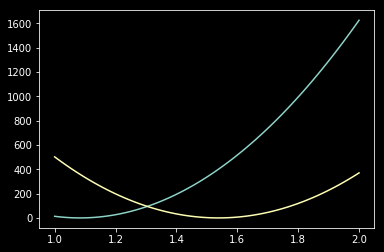

In [129]:
plt.plot(x, y_ch, x, y_cc)

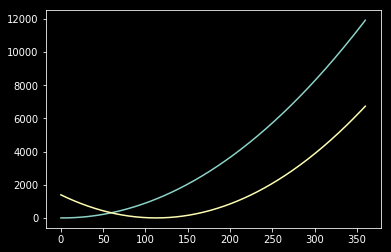

In [130]:
x = np.linspace(0, 360, 360)
y_cch = e_bend('cch', x)
y_ccc = e_bend('ccc', x)

plt.plot(x,y_cch, x, y_ccc)

25.080000000000002


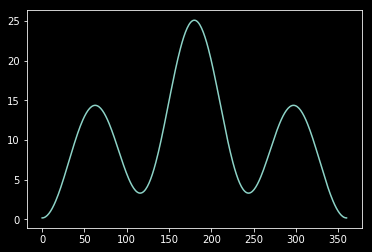

In [135]:
x = np.linspace(0, 360, 360)
y_cccc = e_torsion(x)

print(e_torsion(180))
plt.plot(x,y_cccc)

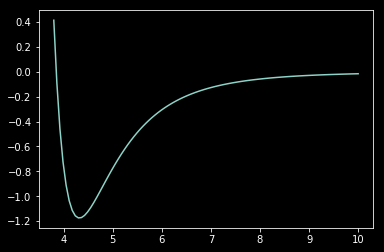

In [144]:
x = np.linspace(3.8, 10, 100)
y = e_nb(x)
plt.plot(x,y)